<center><b>Assignment for Business Intelligence Summer 2021 Internship</b></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [2]:
df1=pd.read_csv('BI-Intern first_purchases.csv',date_parser=True)
df2=pd.read_csv('BI-Intern purchases.csv',date_parser=True)

In [3]:
df1

,User First Purchase Month,First Purchase Product Line,User ID,Purchase ID,Venue ID
0,1.5.2020,Restaurant,57b48aece14f6d64522f8c5f,5ec6b23c96741b6db6266639,5d7a32a73b546fccd88a05e9
1,1.5.2020,Restaurant,59f4803cdf196473b7fc124d,5ec6be1e712a4248e67d2bf0,5cd16542c7420059cc10b792
2,1.5.2020,Restaurant,5a427fbbea63d5000aff0ade,5ec7f07674bbff7edcb5be0d,5e7bce9ae360062306b4a233
3,1.5.2020,Restaurant,5a8c70b58fac51000b2ca9d8,5eac48651db7a19612824809,5e6ce90a7455f89bbb00be37
4,1.5.2020,Restaurant,5a9efa9bab3442000c2ba457,5eca9ed670a4dafe5de07698,5ea18277857aaa1b337ee201
...,...,...,...,...,...
71252,1.10.2020,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2
71253,1.10.2020,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd
71254,1.10.2020,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d
71255,1.10.2020,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423


In [4]:
df1.count()

User First Purchase Month      71257
First Purchase Product Line    71257
User ID                        71257
Purchase ID                    71257
Venue ID                       71257
dtype: int64

In [5]:
# Rename columns for concatenating
df1.rename(columns={'User First Purchase Month':'Purchases Time Delivered','First Purchase Product Line':'Product line'},inplace=True)

In [6]:
# Change type of column to datetime
df1['Purchases Time Delivered'] = pd.to_datetime(df1['Purchases Time Delivered'], format="%d.%m.%Y")

In [7]:
df1.dtypes

Purchases Time Delivered    datetime64[ns]
Product line                        object
User ID                             object
Purchase ID                         object
Venue ID                            object
dtype: object

In [8]:
df2

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID
0,1.8.2020,Restaurant,55080d6585f6661a3b37f7a5,5f3d81ef6cce0eeb05225f98,5e8b2c8be050b99f26647804
1,1.8.2020,Restaurant,55080d6585f6661a3b37f7a5,5f3c11f5a90667e766b04c19,5e8b2c8be050b99f26647804
2,1.7.2020,Retail store,556202537f84a43ac29ec7cb,5f0aec594c3cbeb4049ea36a,5ec2ab4401f812138e435c89
3,1.7.2020,Retail store,556202537f84a43ac29ec7cb,5f184a3c88046da058c5ed1d,5ec2ab4401f812138e435c89
4,1.5.2020,Restaurant,57b48aece14f6d64522f8c5f,5ecf98f34d3d68dc996dad7a,5cb4425ae93cce000d20612f
...,...,...,...,...,...
298709,1.10.2020,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2
298710,1.10.2020,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd
298711,1.10.2020,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d
298712,1.10.2020,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423


In [9]:
df2.count()

Purchases Time Delivered    298714
Product line                298714
User ID                     298714
Purchase ID                 298714
Venue ID                    298714
dtype: int64

In [10]:
# Change type of column to datetime
df2['Purchases Time Delivered'] = pd.to_datetime(df2['Purchases Time Delivered'], format="%d.%m.%Y")

In [11]:
df2.dtypes

Purchases Time Delivered    datetime64[ns]
Product line                        object
User ID                             object
Purchase ID                         object
Venue ID                            object
dtype: object

In [12]:
# Concatenating two tables of data
df3=pd.concat([df1, df2], ignore_index=True)

In [13]:
df3

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID
0,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ec6b23c96741b6db6266639,5d7a32a73b546fccd88a05e9
1,2020-05-01,Restaurant,59f4803cdf196473b7fc124d,5ec6be1e712a4248e67d2bf0,5cd16542c7420059cc10b792
2,2020-05-01,Restaurant,5a427fbbea63d5000aff0ade,5ec7f07674bbff7edcb5be0d,5e7bce9ae360062306b4a233
3,2020-05-01,Restaurant,5a8c70b58fac51000b2ca9d8,5eac48651db7a19612824809,5e6ce90a7455f89bbb00be37
4,2020-05-01,Restaurant,5a9efa9bab3442000c2ba457,5eca9ed670a4dafe5de07698,5ea18277857aaa1b337ee201
...,...,...,...,...,...
369966,2020-10-01,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2
369967,2020-10-01,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd
369968,2020-10-01,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d
369969,2020-10-01,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423


In [14]:
# Table to explore purchase times from each customers
a=df3['User ID'].value_counts()
retention=pd.DataFrame({'User ID':a.index, 'Purchase Count':a.values})

In [15]:
retention

,User ID,Purchase Count
0,5ec04f84d2868704abb52f98,206
1,5eea584439f726a586098e28,192
2,5ed37beb85374d378ed67758,182
3,5e92f86d8543cc9871d7057a,173
4,5ee54eb4113c1657c503a95f,169
...,...,...
74563,5bb51577cea867000c0f90d6,1
74564,5dd162dd087fe875a1156521,1
74565,5b3775f16d8391000ca997e0,1
74566,5db42ed1755f8dfcc3663cf0,1


In [16]:
# Top 20 customers with the most regular usages
retention.head(20)

,User ID,Purchase Count
0,5ec04f84d2868704abb52f98,206
1,5eea584439f726a586098e28,192
2,5ed37beb85374d378ed67758,182
3,5e92f86d8543cc9871d7057a,173
4,5ee54eb4113c1657c503a95f,169
5,5ebb171bdf7d418abd2b0da6,169
6,5eac42801adae91423b8ee6a,139
7,5f285087da54684fc419703f,134
8,5eb57a7e97293fe371cad295,132
9,5edce5e7754894f1bab21b2c,131


In [17]:
# Get insights from collective purchase count
retention['Purchase Count'].describe()

count    74568.000000
mean         4.961525
std          7.569309
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        206.000000
Name: Purchase Count, dtype: float64

C:\Users\ducng\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


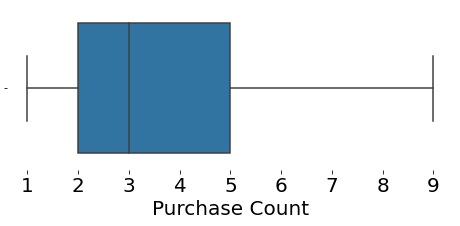

In [18]:
# Using boxplot to get statistics
plt.figure(figsize=(8,3))
sns.boxplot(retention['Purchase Count'], sym='')
plt.xticks(fontsize=20)
plt.xlabel('Purchase Count',fontsize=20)
sns.despine(left=True,bottom=True)

Median purchase count is 3<br>
75% of the users span from 2 to 5

In [19]:
# Categorizing customers usage
once=0
twice_to_tenth=0
rarely=0
regular=0
for j in retention['Purchase Count']:
    if j == 1:
        once+=1
    elif j > 1 and j <=10:
        twice_to_tenth+=1
    elif j > 10 and j <= 24:
        rarely+=1
    elif j > 20:
        regular+=1

In [20]:
print(once,twice_to_tenth,rarely,regular)

1885 65791 5087 1805


We can see that, most of customers used the service merely twice to tenth time in the given period time <br>
Rarely customers is in a range between more than 10 times usage and average once a week in 24 weeks <br>
Regular customers are greater than once time using customers but smaller than rarely using customers<br>
It could be due to the delivery fee ( based on distance), somehow delaying in delivery, less discount season from restaurants<br> and retail stores together with unappropriated price have led to the difficulty to keep customers

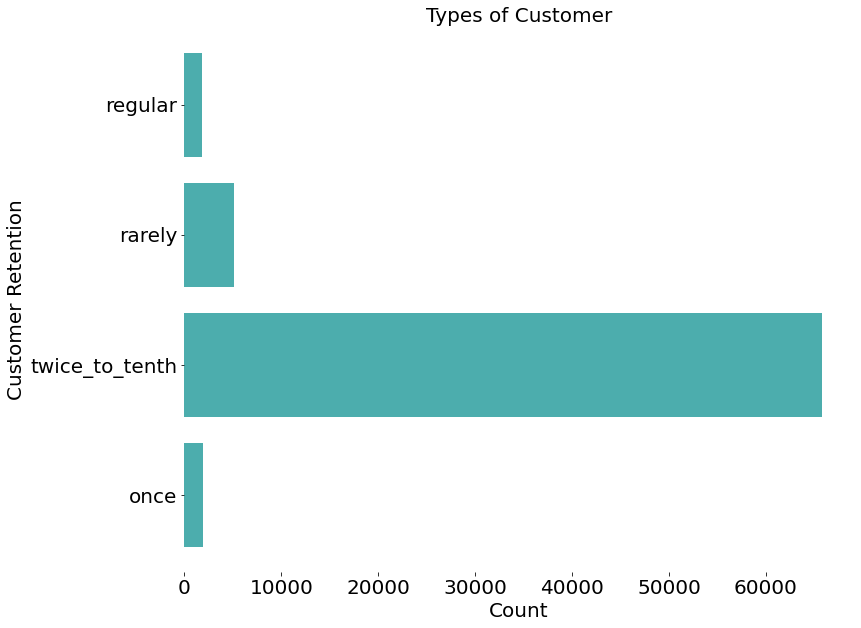

In [21]:
plt.figure(figsize=(12,10))
sizes=[once,twice_to_tenth,rarely,regular]
labels=('once','twice_to_tenth','rarely','regular')
y_pos=np.arange(len(labels))
ax=plt.barh(y_pos,sizes, align='center', alpha=0.7,color='#008B8B')
plt.yticks(y_pos,labels,fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Customer Retention',fontsize=20)
plt.xlabel('Count',fontsize=20)
plt.title('Types of Customer',fontsize=20)
sns.despine(left=True,bottom=True)
plt.show()

## Data preparation

In [22]:
# Using datetime library, we extracted the month, year
df3['month'] = df3['Purchases Time Delivered'].dt.month
df3['year']=df3['Purchases Time Delivered'].dt.year

In [23]:
# In order to sort them in order, we should multiply the year by 100 and add the month to that value. 
# This will create an order that can be sorted correctly.
df3['cohort'] = df3.apply(lambda row: (row['year'] * 100) + (row['month']), axis=1)

In [24]:
df3

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID,month,year,cohort
0,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ec6b23c96741b6db6266639,5d7a32a73b546fccd88a05e9,5,2020,202005
1,2020-05-01,Restaurant,59f4803cdf196473b7fc124d,5ec6be1e712a4248e67d2bf0,5cd16542c7420059cc10b792,5,2020,202005
2,2020-05-01,Restaurant,5a427fbbea63d5000aff0ade,5ec7f07674bbff7edcb5be0d,5e7bce9ae360062306b4a233,5,2020,202005
3,2020-05-01,Restaurant,5a8c70b58fac51000b2ca9d8,5eac48651db7a19612824809,5e6ce90a7455f89bbb00be37,5,2020,202005
4,2020-05-01,Restaurant,5a9efa9bab3442000c2ba457,5eca9ed670a4dafe5de07698,5ea18277857aaa1b337ee201,5,2020,202005
...,...,...,...,...,...,...,...,...
369966,2020-10-01,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2,10,2020,202010
369967,2020-10-01,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd,10,2020,202010
369968,2020-10-01,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d,10,2020,202010
369969,2020-10-01,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423,10,2020,202010


In [25]:
b=df3['month'].value_counts().sort_index()

In [26]:
amount=pd.DataFrame({'Month':b.index,'Purchase_Count':b.values})

In [27]:
amount

,Month,Purchase_Count
0,5,49567
1,6,52806
2,7,53430
3,8,62766
4,9,97397
5,10,54005


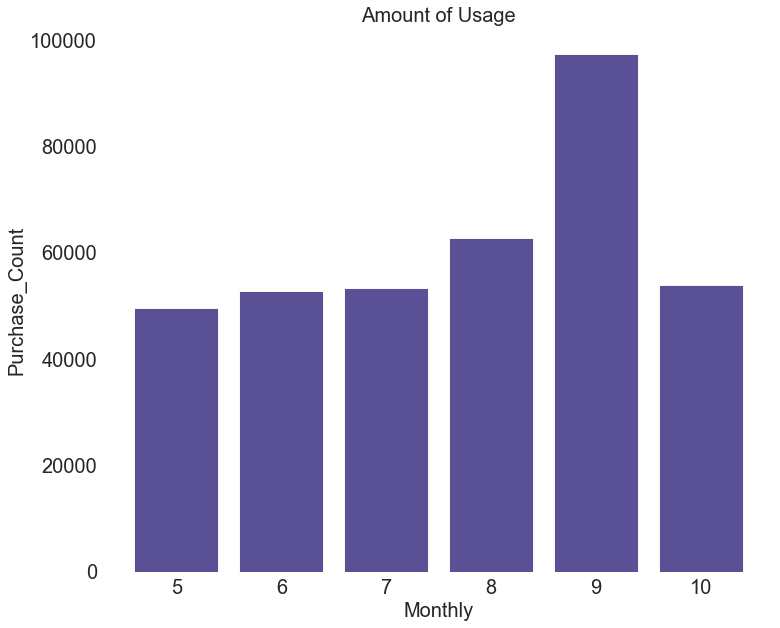

In [28]:
sns.set_style('white')
plt.figure(figsize=(12,10))
objects = amount['Month']
y_pos = np.arange(len(objects))
performance = amount['Purchase_Count']
plt.bar(y_pos, performance, align='center',color='#483D8B',alpha=0.9)
plt.xticks(y_pos, objects,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Purchase_Count',fontsize=20)
plt.xlabel('Monthly',fontsize=20)
plt.title('Amount of Usage',fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

Mostly orders increase from August to October, specifically reach a peak in September with 97397 usages.

In [29]:
# After we create a column called ‘cohort’, we will group all the orders by the CustomerID 
# and find the minimum cohort to find the cohort they belong in as their first purchase.
cohorts = df3.groupby('User ID')['cohort'].min().reset_index()

In [30]:
cohorts

,User ID,cohort
0,55080d6585f6661a3b37f7a5,202008
1,556202537f84a43ac29ec7cb,202007
2,57b48aece14f6d64522f8c5f,202005
3,57b5a1c7791b5a4aafe403ef,202010
4,582212cb8033270d91515225,202009
...,...,...
74563,5f874372e71892d52313343f,202010
74564,5f874b92a026a2143bab6e63,202010
74565,5f874e647a7169ef6a023235,202010
74566,5f875552c7b1a240baf4cc97,202010


In [31]:
# We’ll rename the columns to CustomerID and first cohort 
# Merge new DataFrame with our previous data
cohorts.columns = ['User ID', 'first_cohort']
df3 = df3.merge(cohorts, on='User ID', how='left')

In [32]:
df3

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID,month,year,cohort,first_cohort
0,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ec6b23c96741b6db6266639,5d7a32a73b546fccd88a05e9,5,2020,202005,202005
1,2020-05-01,Restaurant,59f4803cdf196473b7fc124d,5ec6be1e712a4248e67d2bf0,5cd16542c7420059cc10b792,5,2020,202005,202005
2,2020-05-01,Restaurant,5a427fbbea63d5000aff0ade,5ec7f07674bbff7edcb5be0d,5e7bce9ae360062306b4a233,5,2020,202005,202005
3,2020-05-01,Restaurant,5a8c70b58fac51000b2ca9d8,5eac48651db7a19612824809,5e6ce90a7455f89bbb00be37,5,2020,202005,202005
4,2020-05-01,Restaurant,5a9efa9bab3442000c2ba457,5eca9ed670a4dafe5de07698,5ea18277857aaa1b337ee201,5,2020,202005,202005
...,...,...,...,...,...,...,...,...,...
369966,2020-10-01,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2,10,2020,202010,202010
369967,2020-10-01,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd,10,2020,202010,202010
369968,2020-10-01,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d,10,2020,202010,202010
369969,2020-10-01,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423,10,2020,202010,202010


In [33]:
# Define types of product line
df3['Product line'].unique()

array(['Restaurant', 'Retail store'], dtype=object)

In [34]:
# Call the “value_counts” function on cohorts column and reset the index
headers = df3['cohort'].value_counts().reset_index()

In [35]:
headers.columns = ['Cohorts', 'Count']

In [36]:
# Result in two columns of all cohorts and the amount occurs
headers

,Cohorts,Count
0,202009,97397
1,202008,62766
2,202010,54005
3,202007,53430
4,202006,52806
5,202005,49567


In [37]:
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()

In [38]:
# Result in an ordered list of cohorts
headers

[202005, 202006, 202007, 202008, 202009, 202010]

In [39]:
# In order to create a cohort analysis, we need to create a DataFrame that has an index of each user’s first month of making a purchase 
# and the amount of times that the percent that made a purchase in the subsequent months.
# Cohort distance will be the amount of months between the current order and the first purchase from the customer
df3['cohort_distance'] = df3.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort'])) if (row['first_cohort'] != 0 and row['cohort'] != 0)else np.nan, axis=1)

In [40]:
df3

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID,month,year,cohort,first_cohort,cohort_distance
0,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ec6b23c96741b6db6266639,5d7a32a73b546fccd88a05e9,5,2020,202005,202005,0
1,2020-05-01,Restaurant,59f4803cdf196473b7fc124d,5ec6be1e712a4248e67d2bf0,5cd16542c7420059cc10b792,5,2020,202005,202005,0
2,2020-05-01,Restaurant,5a427fbbea63d5000aff0ade,5ec7f07674bbff7edcb5be0d,5e7bce9ae360062306b4a233,5,2020,202005,202005,0
3,2020-05-01,Restaurant,5a8c70b58fac51000b2ca9d8,5eac48651db7a19612824809,5e6ce90a7455f89bbb00be37,5,2020,202005,202005,0
4,2020-05-01,Restaurant,5a9efa9bab3442000c2ba457,5eca9ed670a4dafe5de07698,5ea18277857aaa1b337ee201,5,2020,202005,202005,0
...,...,...,...,...,...,...,...,...,...,...
369966,2020-10-01,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2,10,2020,202010,202010,0
369967,2020-10-01,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd,10,2020,202010,202010,0
369968,2020-10-01,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d,10,2020,202010,202010,0
369969,2020-10-01,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423,10,2020,202010,202010,0


## Cohort based monthly retention for Restaurant product line

In [41]:
# Product line for restaurant
restaurant=df3[df3['Product line']=='Restaurant']

In [42]:
restaurant

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID,month,year,cohort,first_cohort,cohort_distance
0,2020-05-01,Restaurant,57b48aece14f6d64522f8c5f,5ec6b23c96741b6db6266639,5d7a32a73b546fccd88a05e9,5,2020,202005,202005,0
1,2020-05-01,Restaurant,59f4803cdf196473b7fc124d,5ec6be1e712a4248e67d2bf0,5cd16542c7420059cc10b792,5,2020,202005,202005,0
2,2020-05-01,Restaurant,5a427fbbea63d5000aff0ade,5ec7f07674bbff7edcb5be0d,5e7bce9ae360062306b4a233,5,2020,202005,202005,0
3,2020-05-01,Restaurant,5a8c70b58fac51000b2ca9d8,5eac48651db7a19612824809,5e6ce90a7455f89bbb00be37,5,2020,202005,202005,0
4,2020-05-01,Restaurant,5a9efa9bab3442000c2ba457,5eca9ed670a4dafe5de07698,5ea18277857aaa1b337ee201,5,2020,202005,202005,0
...,...,...,...,...,...,...,...,...,...,...
369966,2020-10-01,Restaurant,5f874372e71892d52313343f,5f8745bfae557239f1cbe4db,5f2d6542365ed912d6c545f2,10,2020,202010,202010,0
369967,2020-10-01,Restaurant,5f874b92a026a2143bab6e63,5f874fd5e86004c65a133d47,5e6ccb03b1d0a9394d072fcd,10,2020,202010,202010,0
369968,2020-10-01,Restaurant,5f874e647a7169ef6a023235,5f875660afcc5ba542f3f332,5e77a757c55bc12714975c4d,10,2020,202010,202010,0
369969,2020-10-01,Restaurant,5f875552c7b1a240baf4cc97,5f87582ed5481f4e72e02218,5f4cfc839232473565cfd423,10,2020,202010,202010,0


In [43]:
restaurant['cohort_distance'].unique()

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [44]:
# Create a DataFrame that has its rows mark the first purchase cohort while the columns are the months since. 
# The values inside will signify how many customers from that cohort purchases in that period. 
# The first column will always be the largest.
cohort_pivot_restaurant = pd.pivot_table(restaurant, index='first_cohort', columns='cohort_distance', values='User ID', aggfunc=pd.Series.nunique)

In [45]:
# Pivot_table method allows us to pivot our data so that we can calculate the amount of unique customers 
# in each cohort based on that purchases distance from their first purchase in months.
cohort_pivot_restaurant

cohort_distance,0,1,2,3,4,5
first_cohort,,,,,,
202005,16874.0,6107.0,4766.0,4483.0,4753.0,3446.0
202006,11280.0,3955.0,3369.0,3309.0,2299.0,NaN
202007,9140.0,3042.0,2731.0,1916.0,NaN,NaN
202008,9938.0,3436.0,2205.0,NaN,NaN,NaN
202009,16259.0,4669.0,NaN,NaN,NaN,NaN
202010,7838.0,NaN,NaN,NaN,NaN,NaN


In [46]:
# Divide each row by the first column 
# so that we can have a percentage of the customers that have returned from that cohort to make a purchase
# by using the div function
cohort_pivot_restaurant = cohort_pivot_restaurant.div(cohort_pivot_restaurant[0],axis=0)

In [47]:
cohort_pivot_restaurant

cohort_distance,0,1,2,3,4,5
first_cohort,,,,,,
202005,1.0,0.361918,0.282446,0.265675,0.281676,0.20422
202006,1.0,0.350621,0.298670,0.293351,0.203812,NaN
202007,1.0,0.332823,0.298796,0.209628,NaN,NaN
202008,1.0,0.345744,0.221876,NaN,NaN,NaN
202009,1.0,0.287164,NaN,NaN,NaN,NaN
202010,1.0,NaN,NaN,NaN,NaN,NaN


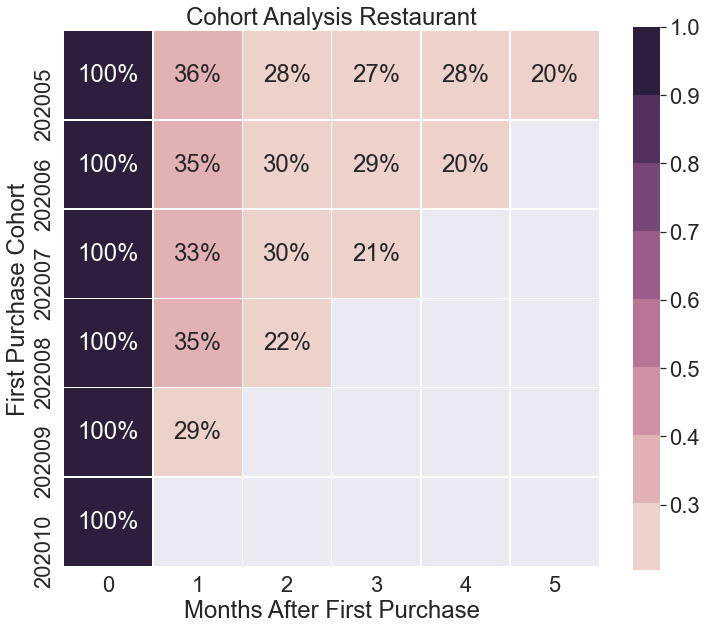

In [69]:
# Heatmap out of cohort analysis
plt.figure(figsize=(12,10))
sns.set(font_scale=2)
y_labels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
x_labels = range(0, len(y_labels))
plt.yticks(ticks=headers, labels=y_labels)
plt.xticks(ticks=x_labels, labels=x_labels)
plt.title("Cohort Analysis Restaurant")
sns.heatmap(cohort_pivot_restaurant, annot=True, fmt='.0%', mask=cohort_pivot_restaurant.isnull(), square=True, linewidths=.5, cmap=sns.cubehelix_palette(8),robust=True)
plt.xlabel('Months After First Purchase')
plt.ylabel('First Purchase Cohort')
plt.show()

In the restaurant field, all types of customer tend to order less in the next few months. <br>
I assume that the price for food from restaurants are more expensive and maybe less discount season.<br>
Another reason would be shipping fee due to a further location from restaurant to customer's address

## Cohort based monthly retention for Retail product line

In [49]:
# Product line for retail store
retail=df3[df3['Product line']=='Retail store']

In [50]:
retail

,Purchases Time Delivered,Product line,User ID,Purchase ID,Venue ID,month,year,cohort,first_cohort,cohort_distance
70,2020-05-01,Retail store,5b28db0f7a8472000abda645,5ebeb46426cab35aa85405fb,5cd4307fcb5b91c9618a38a5,5,2020,202005,202005,0
104,2020-05-01,Retail store,5b3f27a7a877e4000bcdd4b4,5ec65d89fb9a2f43bc714441,5ebc105f7ffe55a986c9c53a,5,2020,202005,202005,0
304,2020-05-01,Retail store,5b796e7e3e727c000a1e6f71,5eafd34766113bbf2fc1cadf,5cd4307fcb5b91c9618a38a5,5,2020,202005,202005,0
314,2020-05-01,Retail store,5b7d8b166eeb6e00094c69e7,5ec186d81bd84e3c57f9c5d9,5e73cb5d891277fa4aa54e24,5,2020,202005,202005,0
376,2020-05-01,Retail store,5b8ffa55d17edb000ca36b4e,5eb3c8370d03e88142044500,5e7357143df80dcb8ccc5494,5,2020,202005,202005,0
...,...,...,...,...,...,...,...,...,...,...
369565,2020-10-01,Retail store,5f859dedb9aba42d12676d48,5f85ba652239d4d7258cbc60,5e73cb5d891277fa4aa54e24,10,2020,202010,202010,0
369636,2020-10-01,Retail store,5f85cf7dd2e602d4b45d2cce,5f8729647ccb7de6c66c3f34,5e73cb5d891277fa4aa54e24,10,2020,202010,202010,0
369649,2020-10-01,Retail store,5f85d46ce092f8028962d76a,5f86fed2629cfe4db11d036f,5ea2e5166a0b5ae76f4d3c21,10,2020,202010,202010,0
369866,2020-10-01,Retail store,5f87027440cb30e327ce24c6,5f8703ff3acebf25456c2e16,5ecd33c7c9f93bac27626c62,10,2020,202010,202010,0


In [51]:
retail['cohort_distance'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [52]:
cohort_pivot_retail = pd.pivot_table(retail, index='first_cohort', columns='cohort_distance', values='User ID', aggfunc=pd.Series.nunique)

In [53]:
cohort_pivot_retail

cohort_distance,0,1,2,3,4,5
first_cohort,,,,,,
202005,1034.0,296.0,208.0,188.0,231.0,170.0
202006,643.0,170.0,148.0,180.0,100.0,NaN
202007,430.0,133.0,134.0,60.0,NaN,NaN
202008,544.0,202.0,87.0,NaN,NaN,NaN
202009,873.0,195.0,NaN,NaN,NaN,NaN
202010,305.0,NaN,NaN,NaN,NaN,NaN


In [54]:
cohort_pivot_retail = cohort_pivot_retail.div(cohort_pivot_retail[0],axis=0)

In [55]:
cohort_pivot_retail

cohort_distance,0,1,2,3,4,5
first_cohort,,,,,,
202005,1.0,0.286267,0.201161,0.181818,0.223404,0.16441
202006,1.0,0.264386,0.230171,0.279938,0.155521,NaN
202007,1.0,0.309302,0.311628,0.139535,NaN,NaN
202008,1.0,0.371324,0.159926,NaN,NaN,NaN
202009,1.0,0.223368,NaN,NaN,NaN,NaN
202010,1.0,NaN,NaN,NaN,NaN,NaN


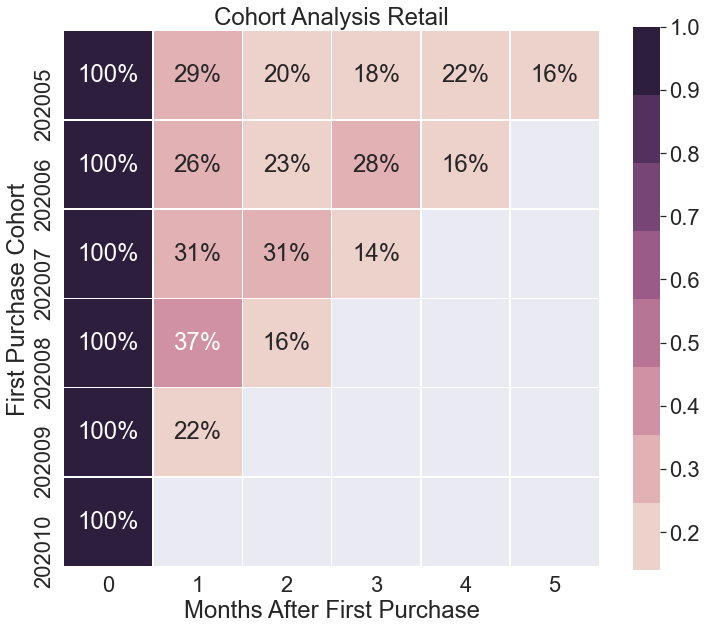

In [71]:
plt.figure(figsize=(12,10))
sns.set(font_scale=2)
y_labels = [str(int(header)%100) + '-' + str(int(header)/100) for header in headers]
x_labels = range(0, len(y_labels))
plt.yticks(ticks=headers, labels=y_labels)
plt.xticks(ticks=x_labels, labels=x_labels)
plt.title("Cohort Analysis Retail")
sns.heatmap(cohort_pivot_retail, annot=True, fmt='.0%', mask=cohort_pivot_retail.isnull(), square=True, linewidths=.5, cmap=sns.cubehelix_palette(8))
plt.xlabel('Months After First Purchase')
plt.ylabel('First Purchase Cohort')
plt.show()

The customer's purchase behavior in the retail ordering is quite fluctuated.<br>
For customers who have first purchases in May tend to order less from next few months<br>
But customers who have first purchases in June, they increasingly order more in August<br>
Customers who have first purchases in July maintain the order rate from August to September (31%) then bottom down in October.<br>
Customers who have first purchases in August have the most order maintaining rate on September (37%)<br>
In conclusion, most customers have registered to the service and regularly used to order food from June to September (Summer and Autumn season)

Beside the retention, I would chose to explore time delivery (on time delivering is important to a customer service), ratings and comments to analyze customers satisfaction to a product/service and listen to their needs to improve more.